In [5]:
import numpy as np
import cv2
import matplotlib.pylab as plt
import random
import math 
from mpl_toolkits.axes_grid1 import ImageGrid
!pip install opencv-python



def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")   

minAreaRect : 특정 외곽선을 감싸는 가장 작은 사각형의 면적.
minEnclosing Circle : 칸투어 최소크기의 원을 추출.

epsilon? 
보통 외곽선 또는 곡선 길이의 일정 비율이다. 전체길이의 2퍼센트보다 작으면 칸투어를 추가하지 않는다. 

더글라스 포이커 알고리즘을 사용하여 곡선 또는 다각형을 단순화시킨다.

외곽선 처리함수, 이게 사각형인지 삼각형인지 구분하는 검출.

입력영상에 있는 모든 도형 객체의 바깥쪽 외곽선을 찾고 각 외곽선을 근사화. 만약 근사화된 외곽선이 점 세개면 감각형, 네개면 사각형으로 판단한다. 

P : 칸투어의 길이
A : 면적
으로 외곽선 길이와 도형의 면적 비율 R을 조사한다.

원의 둘레는 2piR이다. 길이고 원의 넓이는 pir^2이다. 
P가 원의 둘레의 제곱이다. 

따라서 완벽한 원일 경우에는 이 R값이1이 나오게 될 것이다.
따라서 이 비율을 가지고 길이와 면적을 가짖고 판단할 수 있다.

0.8보다 크면 원이라고 판단한다.


# 1. 외관선 처리

((458.70343017578125, 381.97894287109375), (634.2526245117188, 202.513916015625), 44.29268264770508)
[[161 232]
 [302  88]
 [756 530]
 [614 675]]


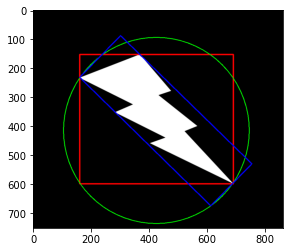

In [2]:
src = cv2.imread('shape.png')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

_, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cnts, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#최외곽만 추출 APPROX는 사용하지 않음.
cnt = cnts[0]
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(src, (x,y), (x+w, y+h) , (0,0,255), 3)

(x, y), radius = cv2.minEnclosingCircle(cnt)
cv2.circle(src, (int(x),int(y)), int(radius), (0, 255, 0), 2)


rect = cv2.minAreaRect(cnt)#가장작은 회전 사각형
print(rect)#위의 박스
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)#실제 물리적인 박스좌표
cv2.drawContours(src, [box], -1, (255,0,0), 4)                       


imshow("", src)

# 2. 외곽선 근사화

13340.5
8085.5
10359.0
0.0
6406.5
4181.0
6723.0
9930.5
10315.5


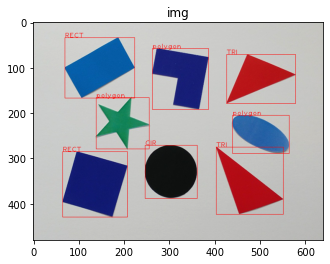

In [3]:
def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))


img = cv2.imread('polygon.bmp', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for pts in contours:
    print(cv2.contourArea(pts))# 원 좌표 출력 총 9개가 출력됨
    if cv2.contourArea(pts) < 400:
        continue

    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    vtc = len(approx)

    if vtc == 3:
        setLabel(img, pts, 'TRI')
    elif vtc == 4:
        setLabel(img, pts, 'RECT')
    else:
        lenth = cv2.arcLength(pts, True)#칸투어 길이를 구한다.
        area = cv2.contourArea(pts)
        ratio = 4. * math.pi * area / (lenth * lenth)

        if ratio > 0.85:#0.85보다 크면 원이라고 출력한다.
            setLabel(img, pts, 'CIR')
        else :
            setLabel(img, pts, 'polygon')

imshow('img', img)

# 3.활용

### 1) coin 검출

NameError: name 'countours' is not defined

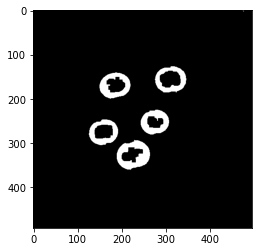

In [4]:
frame = cv2.imread("coin.png")
roi = frame.copy()
gray =  cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (7, 7), 0) #
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 45, 6)
#밝고 어두운부분이 있으니 적응영이진화를 쓴다. 그리고 반전시킨다. 
kernel = np.ones((3, 3), np.uint8)           
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)   
imshow("",closing)
#잔노이즈들이 제거됐다. 너무많이하면 뭉친다.

cont_img = closing.copy()
contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#외곽선 정보 추출
print(len(countours))

for cnt in contours:
    area = cv2.contourArea(cnt)
    printf(len(countours))
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:#length 픽셀개수 5개 미만.
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)   
    #조명이 일정하지 않아도 정교하게 검출할 수 있다.
    
    
imshow("out", thresh),plt.show()                               
imshow("out", cont_img),plt.show()                               
imshow("out", roi),plt.show()                               

### 2) 책 검출

캐니에지를 사용해도 외곽선 정보가 추출할 수 있기에 컨투어 추출을 할 수 있다. 캐니에지가 어떤 영상인지 확인해야하니 어떤 에지들이 추출됐는지 확인해보자. 중간에 끊어져있는부분 연결부분을 확인한다. 

그리고 안쪽 영역을 매꿔야하기때문에 모폴로지 연산을 사용한다.

이제 외곽에 대한 칸투어를 추출한다.
cnts: 칸투어를 추출한다. 
그럼칸투어는 8개가 나온다. 

그다음 칸투어의 길이를 계산한다. 지름과 approxpolyDOP를 구한다.

In [ ]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    printf(len(approx))
    if len(approx) == 4:#사각형에 해당하는것만 칸투어를 그린다. 
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4) #리스트형태를 갖춘다., -1이기에 전체 칸투어를 그린다. 
        total += 1#발견된 책의 수.
print("I found {0} books in that image".format(total))
imshow("Output", image)

### 3) 명함영역 검출

In [ ]:
img = cv2.imread('namecard.png', 0)

gray = cv2.GaussianBlur(img, (13, 13), 0)
_,binary = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)

closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, None,iterations=6)
#클로즈연산은 6번정도 수행했다. 
imshow("", img)
plt.show()
imshow("", closed )

In [ ]:
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
print(len(contours[0])
card = contours[0]
peri = cv2.arcLength(card,True)
approx = cv2.approxPolyDP(card,0.02*peri,True).astype(np.float32)
#전체길이의 2%로 실행을 한다. 
print(approx) # 네개의 점이 정확하게 추출된다.

h = np.array([ [399,0],[0,0],[0,300],[399,300] ],np.float32)
      #변화할 좌표이다. 
approx = approx.reshape(4,2)

transform = cv2.getPerspectiveTransform(approx,h)
print(transform)#즉 approx좌표 4개를 h좌표 네개로 변환시킨다.
#정확하게 똑바로 피는 원근값을 고려한 함수이다.
#변화시킬 값들을 넣어준ㄷ.ㅏ
imshow("", cv2.warpPerspective(img,transform,(400,300))   ) 
#원래이미지를 transform으로 바꿔준다.

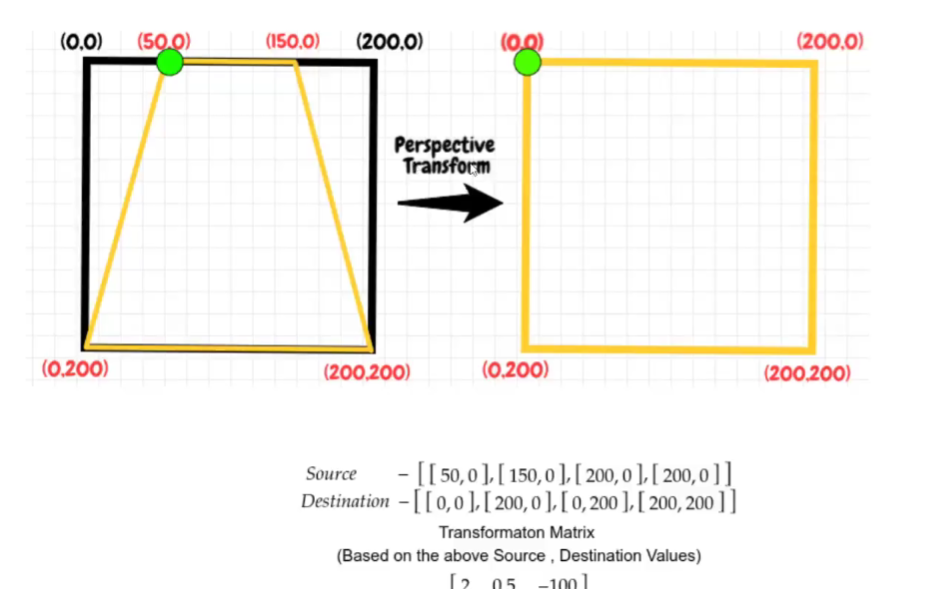

### 4) 카드 패턴 검출

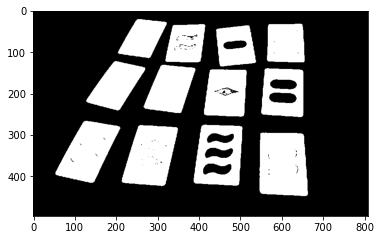

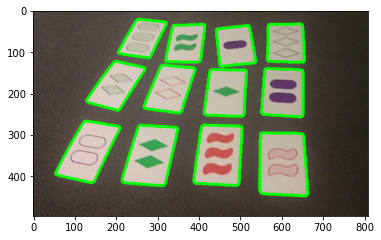

In [6]:
# https://stackoverflow.com/questions/34389384/improve-contour-detection-with-opencv-python


frame = cv2.imread('card.jpg')
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Prepocess
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)

imshow("", thresh); plt.show()
# Find contours
contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

imgcont = img.copy()
cv2.drawContours(imgcont, contours, -1, (0,255,0), 5)
plt.imshow(imgcont)




In [26]:
frame = cv2.imread('card.jpg')
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Prepocess
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(1,1),1000)
flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)

#imshow("", thresh); plt.show()
# Find contours
contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(contours)

[array([[[554, 295]],

       [[553, 296]],

       [[550, 296]],

       [[549, 297]],

       [[549, 312]],

       [[548, 313]],

       [[548, 318]],

       [[549, 319]],

       [[548, 320]],

       [[548, 378]],

       [[547, 379]],

       [[547, 387]],

       [[548, 388]],

       [[548, 391]],

       [[547, 392]],

       [[547, 399]],

       [[548, 400]],

       [[548, 402]],

       [[547, 403]],

       [[547, 435]],

       [[548, 436]],

       [[548, 437]],

       [[549, 438]],

       [[549, 439]],

       [[551, 441]],

       [[553, 441]],

       [[554, 442]],

       [[564, 442]],

       [[565, 443]],

       [[587, 443]],

       [[588, 444]],

       [[603, 444]],

       [[604, 445]],

       [[629, 445]],

       [[630, 446]],

       [[645, 446]],

       [[646, 447]],

       [[659, 447]],

       [[660, 446]],

       [[661, 446]],

       [[662, 445]],

       [[662, 444]],

       [[663, 443]],

       [[663, 436]],

       [[662, 435]],

       [[

In [ ]:
plt.imshow(imgcont)

In [25]:
# 원 검출 결과 및 동전 금액 출력
sum_of_money = 0
dst = src.copy()
if contours is not None:
    for i in range(contours[0][1]):
        cx, cy = contours[i]
        print(cx,cy)
        #radius = int(radius)
        #cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

        # 동전 영역 부분 영상 추출
        x1 = int(cx)
        y1 = int(cy )
        x2 = int(cx )
        y2 = int(cy)
        radius = int(radius)
        
        crop = dst[y1:y2, x1:x2, :]
        ch, cw = crop.shape[:2]

        #cv2.imshow('crop',crop)
        #cv2.waitKey()

        # 동전 영역에 대한 ROI 마스크 영상 생성
        mask = np.zeros((ch, cw), np.uint8)
        cv2.Rectangle(mask, (cw//2, ch//2), radius, 255, -1)

        # 동전 영역 Hue 색 성분을 +40 시프트하고, Hue 평균을 계산
        hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
        hue, _, _ = cv2.split(hsv)
        hue_shift = (hue + 40) % 180
        mean_of_hue = cv2.mean(hue_shift, mask)[0]

        # Hue 평균이 90보다 작으면 10원, 90보다 크면 100원으로 간주
        won = 100
        if mean_of_hue < 90:
            won = 10

        sum_of_money += won

        cv2.putText(crop, str(won), (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    0.75, (255, 0, 0), 2, cv2.LINE_AA)

cv2.putText(dst, str(sum_of_money) + ' won', (40, 80),
            cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


TypeError: only integer scalar arrays can be converted to a scalar index

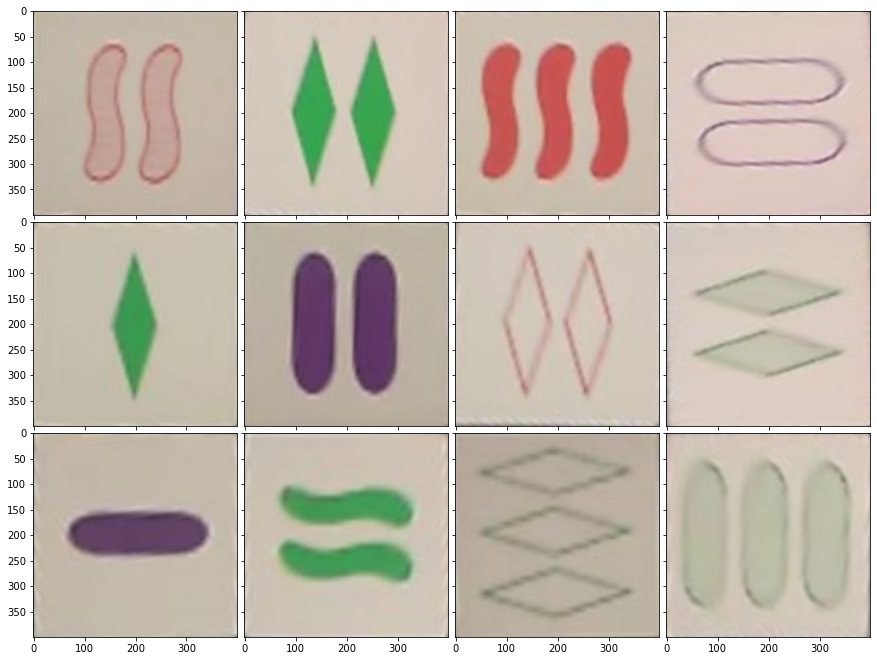

In [7]:
warp = []
for i in range(12):
    card = contours[i]
    peri = cv2.arcLength(card,True)
    approx = cv2.approxPolyDP(card,0.02*peri,True).astype(np.float32)
    
    h = np.array([ [0,0],[399,0],[399,399],[0,399] ],np.float32)
    approx = approx.reshape(4,2)
    transform = cv2.getPerspectiveTransform(approx,h)
    warp.append(cv2.warpPerspective(img,transform,(400,400)))

fig = plt.figure(1, (15,15))
grid = ImageGrid(fig, 111, 
                nrows_ncols = (3, 4),
                axes_pad=0.1, # pad between axes in inch.
                aspect=True, # do not force aspect='equal'
                )

for i in range(12):
    grid[i].imshow(warp[i]) # The AxesGrid object work as a list of axes.

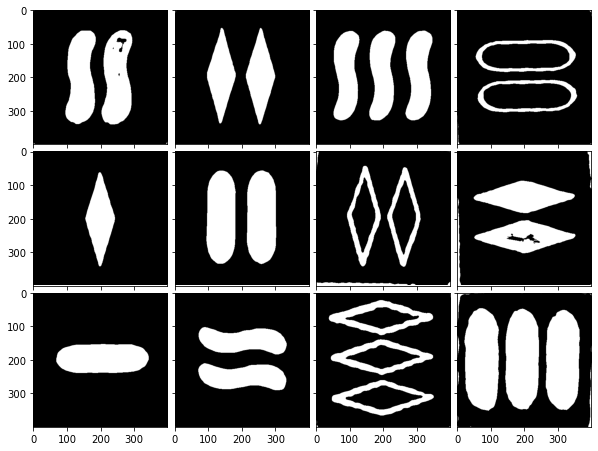

In [8]:
fig = plt.figure(1, (10,10))
grid = ImageGrid(fig, 111, 
                nrows_ncols = (3, 4), 
                axes_pad=0.1, 
                aspect=True,
                )
for i in range(12):
    image2 = cv2.bilateralFilter(warp[i],10,100,100)
    grey = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    _, grey = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)    
    grid[i].imshow(grey,cmap='gray') 

카드검출 후 모양과 색이 무엇인지.
1.외곽선 추출
2.외곽선을 똑바로핌
3.이진화시켜서 칸투어 추출, 
4. 어떤모양
5. 중심정 모양.
6.어떤 개수인지 색깔인지 모양인지 알 수 있다.

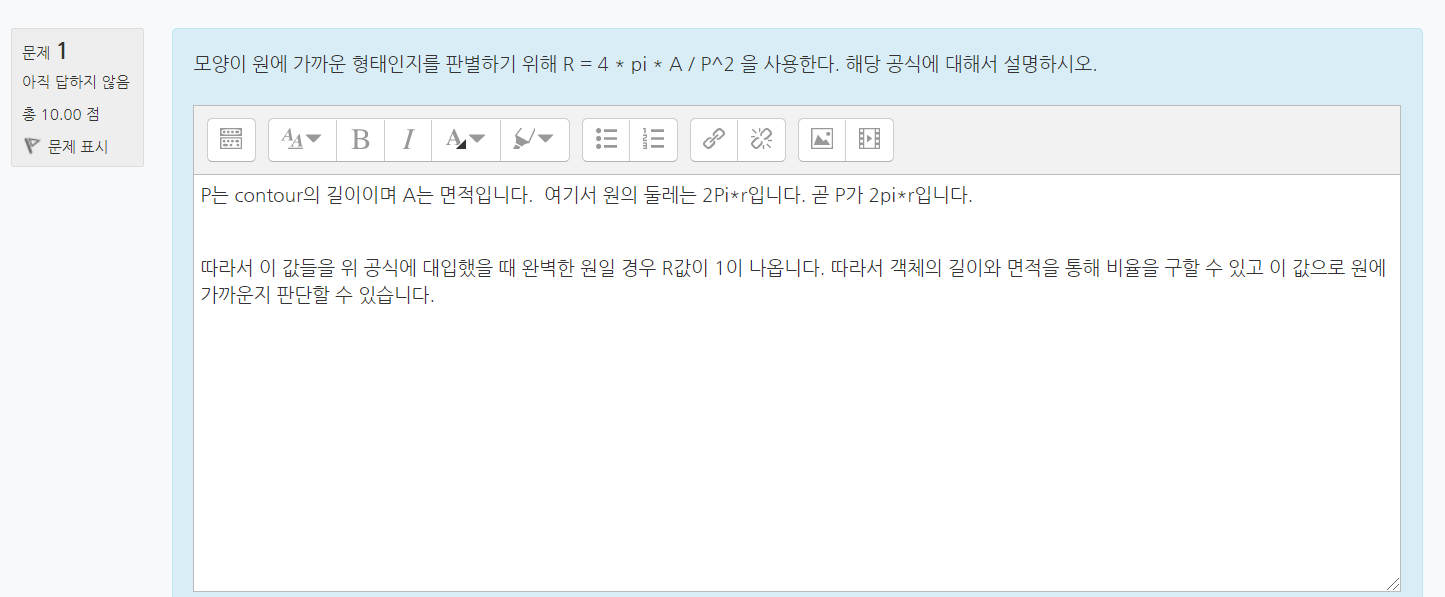

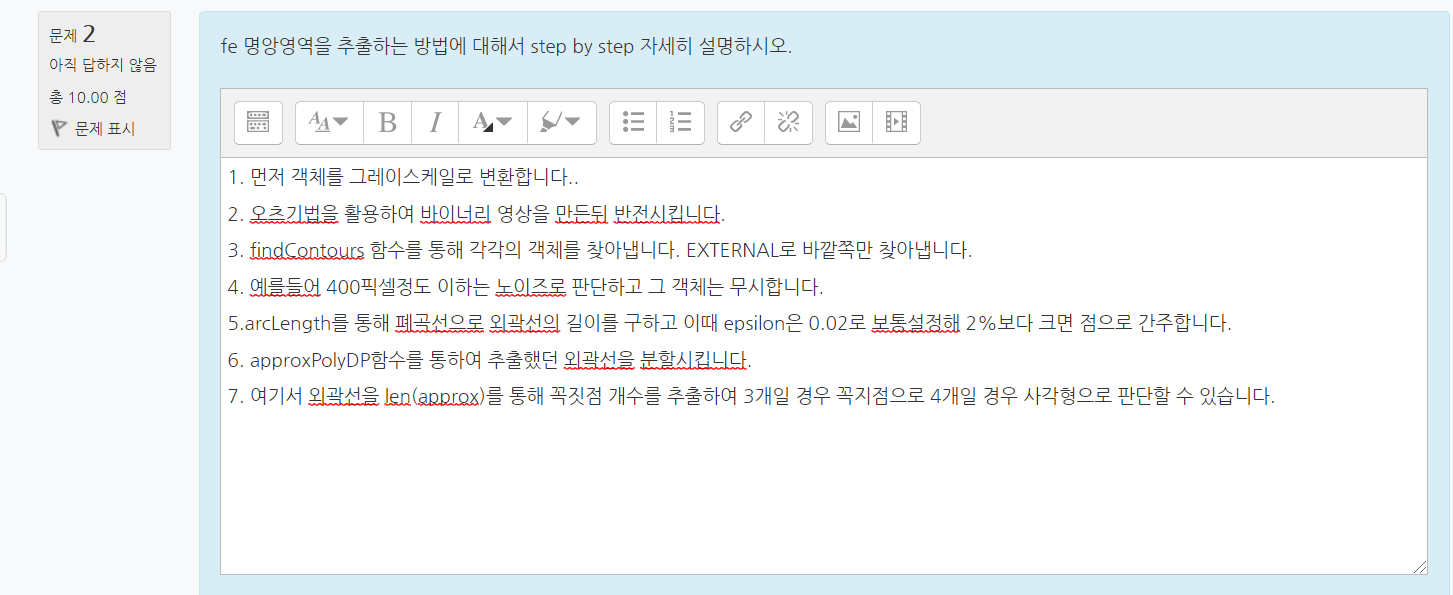